In [1]:
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
df = fdr.DataReader('005930', '2020', '2021')
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-12-23,72400,74000,72300,73900,19411326,0.022130
2020-12-24,74100,78800,74000,77800,32502870,0.052774
2020-12-28,79000,80100,78200,78700,40085044,0.011568
2020-12-29,78800,78900,77300,78300,30339449,-0.005083
2020-12-30,77400,81300,77300,81000,29417421,0.034483


In [2]:
# 20일간 종가의 이동평균
df['MA20'] = df['Close'].rolling(20).mean()

In [3]:
# 기술 통계값
df['Close'].describe()

count      248.000000
mean     57153.225806
std       7061.870134
min      42500.000000
25%      52275.000000
50%      56800.000000
75%      60100.000000
max      81000.000000
Name: Close, dtype: float64

In [4]:
# 분산
df['Close'].var()

49870009.79495885

In [5]:
# 표준편차 == 분산의 제곱근
#df['Close'].var() **0.5
#np.sqrt(df['Close'].var())
df['Close'].std()

7061.870134387835

In [6]:
df['stddev'] = df['Close'].rolling(20).std()
df['UpperB'] = df['MA20'] + (df['stddev'] * 2)
df['LowerB'] = df['MA20'] - (df['stddev'] * 2)

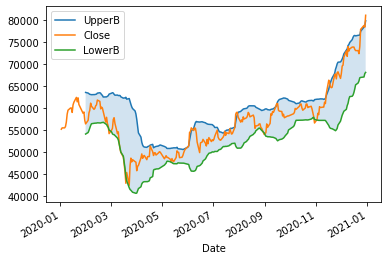

In [7]:
df[['UpperB', 'Close', 'LowerB']].plot()
plt.fill_between(df.index, df.LowerB, df.UpperB, alpha=0.2)

# UpperB와 LowerB를 벗어나는 값은
# 2표준편차 약 95%를 벗어나는 값이다

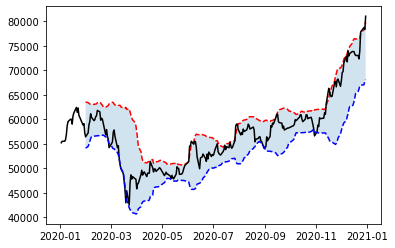

In [10]:
plt.plot(df.index, df.UpperB, 'r--')
plt.plot(df.index, df.Close, 'k')
plt.plot(df.index, df.LowerB, 'b--')
plt.fill_between(df.index, df.LowerB, df.UpperB, alpha=0.2)